# Laser calibration

In this article is presented the laser calibration process. This method is used to determine the position and orientation of a line laser, respect to the camera coordinate system. ![](https://raw.githubusercontent.com/Jesus89/3DScanScience/master/notebooks/images/4.4.%20Laser%20calibration/pattern-position.png)

## Capture laser point cloud

Pattern is automatically moved on the turntable from -90º to 90º respect to the initial position. Each step (5º) it is captured a point cloud of the laser ([Laser segmentation](http://nbviewer.ipython.org/github/Jesus89/3DScanScience/blob/master/notebooks/3.%20Laser%20segmentation.ipynb)) intersecting with the plane of the pattern ([Point cloud generation](http://nbviewer.ipython.org/github/Jesus89/3DScanScience/blob/master/notebooks/6.%20Point%20cloud%20generation.ipynb)). It is used the normal and minimum distance of the plane defined by the pattern. This values are obtained using the pattern pose ([Pattern detection](http://nbviewer.ipython.org/github/Jesus89/3DScanScience/blob/master/notebooks/4.1.%20Pattern%20detection.ipynb)).

At the end of the capture process, a complete point cloud of the laser is obtained. All points in this point cloud are near to the real laser plane. Therefore, this point cloud will be used to determine the plane parameters: the normal vector and the minimum distance respect to the camera coordinate system.

In [1]:
%matplotlib inline

from util import *

# Load point cloud
X = load_ply('laser-pc.ply').vertexes

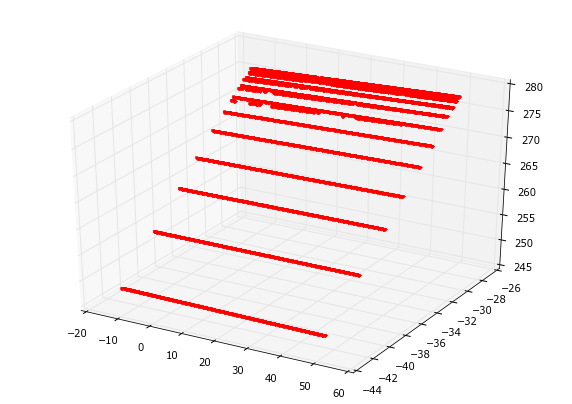

In [2]:
# Plot point cloud
pylab.rcParams['figure.figsize'] = (10, 7)
plt.gca(projection='3d')

plt.plot(X[:,1], X[:,0], X[:,2], '.r')
plt.show()

## Fit laser plane

In order to fit a plane from a point cloud $\textbf{X}$, SVD (Singular Value Decomposition) can be used. This method provides a fast way to obtain the normal $\textbf{n}$ and the distance $d$.

$$
\textbf{X}_i = \begin{bmatrix} x_i \\ y_i \\ z_i \\ \end{bmatrix}
\:\:\:\:\:\:\:\:\:\:
\overline{\textbf{X}} = \frac{1}{n}{\sum{\textbf{X}_i}}
\:\:\:\:\:\:\:\:\:\:
\widetilde{\textbf{X}_i} = \textbf{X}_i - \overline{\textbf{X}}
\:\:\:\:\:\:\:\:\:\:
M = \begin{bmatrix} \widetilde{\textbf{X}_1} \: ... \: \widetilde{\textbf{X}_i} \: ... \: \end{bmatrix}
$$

### Problem
$$
min \: M^T \textbf{n}
\:\:\:\:\:\:
\| \textbf{n} \| = 1
$$
### Solution
$$
M = USV^T
\:\:\:\:\:\:
\textbf{n} = U \begin{bmatrix} 0 \\ 0 \\ 1 \\ \end{bmatrix}
\:\:\:\:\:\:
d = \textbf{n} \: \overline{\textbf{X}}
$$

In [3]:
from scipy.sparse import linalg

n = X.shape[0]
Xm = X.sum(axis=0) / n
M = np.array(X - Xm).T

U = linalg.svds(M, k=2)[0]

n = np.cross(U.T[0], U.T[1])
if n[2] < 0:
    n *= -1

d = np.dot(n, Xm)

print("\nNormal vector\n\n{0}\n".format(n))
print("\nPlane distance\n\n{0} mm\n".format(d))


Normal vector

[-0.87020111 -0.02235228  0.49218953]


Plane distance

159.715179443 mm



## References
* http://www.ltu.se/cms_fs/1.51590!/svd-fitting.pdf